In [305]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [312]:
data = pd.read_csv('/Users/krishna/Downloads/bank-additional/bank-additional-full.csv',sep=';')
data['id'] = data.index
original_data = data

In [313]:
count_row_unknown = 0
id = []
for i in range(len(original_data)-1):
    count_unknown = 0
    for j in range(20):
        if original_data.iloc[i][j]=='unknown':
            count_unknown += 1
    if count_unknown>=3:
        count_row_unknown += 1
        print(count_row_unknown)
        id.append(original_data.iloc[i]['id'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [320]:
filtered_data_1 = original_data[~original_data['id'].isin(id)]
filtered_data_2 = filtered_data_1[~((filtered_data_1.pdays==999) & (filtered_data_1.poutcome=='failure'))]
filtered_data_temp = filtered_data_2

In [355]:
# Remove rows with atleast 3 unknowns
# Remove pdays = 999 and poutcome = 'failure'
# Delete column duration and nr.employed
cleaned_data = filtered_data_temp.drop('duration',axis=1).drop('nr.employed',axis=1)


In [316]:
cleaned_data.to_csv('cleaned_data.csv')

In [219]:
#Taking bank client data from the cleaned dataset
bank_client_data=cleaned_data[['age','job','marital','education','default','housing','loan']]

In [220]:
#Performing Data Pruning for Marital
c_data_removed_marital=bank_client_data

In [221]:
y = c_data_removed_marital['marital']

In [222]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [223]:
Xtest=(c_data_removed_marital[c_data_removed_marital['marital']=='unknown']).drop('marital', axis=1)
Xtrain=(c_data_removed_marital[-(c_data_removed_marital['marital']=='unknown')]).drop('marital', axis=1)

In [224]:
data_correalation(Xtrain)

Index(['job', 'education', 'default', 'housing', 'loan'], dtype='object')


,age,job,education,default,housing,loan
0,56,0,0,0,0,0
1,57,1,1,1,0,0
2,37,1,1,0,1,0
3,40,2,2,0,0,0
4,56,1,1,0,0,1
5,45,1,3,1,0,0
6,59,2,4,0,0,0
7,41,3,5,1,0,0
8,24,4,4,0,1,0
9,25,1,1,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [227]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [228]:
#Fittin RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [229]:
data_correalation(Xtest)

Index(['job', 'education'], dtype='object')


,age,job,education
40,58,0,0
390,59,1,0
413,57,1,1
1493,33,2,2
1608,32,3,0
3167,57,1,1
3478,37,0,2
4196,31,4,2
4344,32,3,0
6376,50,5,3


In [232]:
pred_ = clf.predict((Xtest))

In [239]:
np.unique(np.asarray(list(pd.factorize(ytrain)))[0])

In [240]:
pd.factorize(ytrain)

(array([0, 0, 0, ..., 0, 0, 0]),
 Index(['married', 'single', 'divorced'], dtype='object'))

In [340]:
pred_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1])

In [216]:
#------------------------------------ cleaned_data -----------------------------------------------------


In [356]:
c_data_imputation=cleaned_data.copy()

In [357]:
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation.loc[c_data_imputation.marital=='unknown','marital'] = pred_


In [361]:
c_data_imputation.loc[c_data_imputation.marital==0,'marital'] = 'married'
c_data_imputation.loc[c_data_imputation.marital==1,'marital'] = 'single'
c_data_imputation.loc[c_data_imputation.marital==2,'marital'] = 'divorced'

In [362]:
#--------#
len(c_data_imputation[c_data_imputation['marital']=='unknown']['marital'])

0

In [363]:
c_data_imputation[cleaned_data['marital']=='unknown']['marital']

40        married
390       married
413       married
1493       single
1608      married
3167      married
3478      married
4196      married
4344      married
6376      married
7145      married
7368       single
7573     divorced
7632     divorced
9487      married
9714       single
10547      single
10962     married
11355     married
11679      single
11789     married
11883     married
15134     married
15202      single
15289      single
16662     married
20603     married
20604     married
20761     married
20777     married
20779     married
22262     married
22269     married
25778     married
26509     married
26551     married
26747     married
27835     married
28034     married
29200    divorced
29772     married
30477      single
30522      single
30524     married
31349     married
32009     married
32808     married
32999     married
33315     married
34410     married
36316      single
36380      single
36434     married
37258     married
37387     married
38550    d

In [358]:
np.unique((cleaned_data['marital']=='unknown'))

array([False,  True])

In [258]:
len(pred_)

59

In [ ]:
c_data_imputation.to_csv('imputed_data_marital.csv')

In [282]:
#Performing Data Imputation for Job
c_data_removed_job=bank_client_data

In [283]:
y = c_data_removed_job['job']

In [284]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [186]:
Xtest=(c_data_removed_job[c_data_removed_job['job']=='unknown']).drop('job', axis=1)
Xtrain=(c_data_removed_job[-(c_data_removed_job['job']=='unknown')]).drop('job', axis=1)

In [187]:
data_correalation(Xtrain)

Index(['marital', 'education', 'default', 'housing', 'loan'], dtype='object')


,age,marital,education,default,housing,loan
0,56,0,0,0,0,0
1,57,0,1,1,0,0
2,37,0,1,0,1,0
3,40,0,2,0,0,0
4,56,0,1,0,0,1
5,45,0,3,1,0,0
6,59,0,4,0,0,0
7,41,0,5,1,0,0
8,24,1,4,0,1,0
9,25,1,1,0,1,0


In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.43001127, 0.03817367, 0.47283462, 0.02235105, 0.02152837,
       0.01510102])

<BarContainer object of 6 artists>

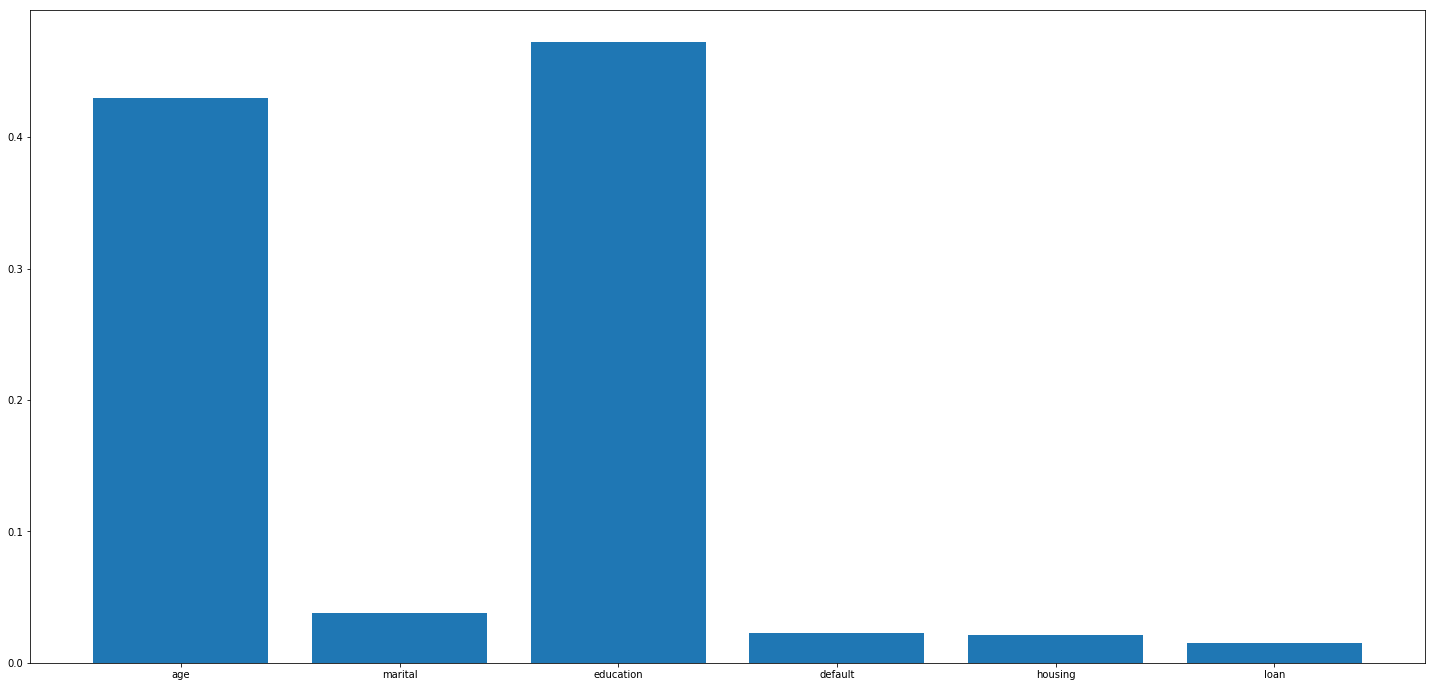

In [189]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [190]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [191]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
data_correalation(Xtest)

Index(['education'], dtype='object')


,age,education
35,55,0
144,38,1
303,43,2
794,28,3
878,28,3
885,43,1
1131,43,1
1165,52,0
1181,44,4
1205,35,3


In [195]:
pred_job = clf.predict((Xtest))

In [280]:
pred_job

array([ 3,  2,  3,  3,  3,  2,  2,  3,  4,  3,  3,  3,  3,  3,  4,  3,  3,
        3,  3,  3,  4,  5,  3,  3,  3,  2,  3,  3,  3,  2,  2,  2,  3,  2,
        4,  3,  4,  3,  3,  3,  4,  4,  3,  3,  2,  4,  4,  3,  3,  4,  4,
        2,  3,  4,  2,  2,  2,  3,  3,  3,  2,  5,  2,  3,  4,  3,  3,  3,
        3,  4,  2,  2,  3,  5,  3,  4,  2,  2,  3,  3,  4,  2,  4,  5,  3,
        4,  4,  2,  3,  3,  2,  3,  3,  4,  3,  3,  2,  4,  3,  3,  3,  3,
        3,  3,  5,  2,  2,  2,  3,  3,  3,  3,  2,  4,  4,  3,  3,  3,  3,
        3,  5,  3,  3,  3,  3,  3,  2,  2,  3,  2,  5,  3,  3,  5,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  2,  5,
        2,  3,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  5,  2,  3,  5,
        2,  2,  3,  3,  3,  5,  5,  5,  5,  2,  2,  2, 10, 10, 10, 10,  2,
        5,  2,  4,  3,  3,  5,  2,  5,  5,  3,  3,  3,  3,  3,  2,  4,  4,
       10,  2,  2,  2,  5

In [365]:
c_data_imputation_1= c_data_imputation.copy()

In [366]:
#------------------------------------ cleaned_data -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_1.loc[c_data_imputation_1.job=='unknown','job'] = pred_job

c_data_imputation_1.loc[c_data_imputation_1.job==0,'job'] = 'housemaid'
c_data_imputation_1.loc[c_data_imputation_1.job==1,'job'] = 'services'
c_data_imputation_1.loc[c_data_imputation_1.job==2,'job'] = 'admin.'
c_data_imputation_1.loc[c_data_imputation_1.job==3,'job'] = 'blue-collar'
c_data_imputation_1.loc[c_data_imputation_1.job==4,'job'] = 'technician'
c_data_imputation_1.loc[c_data_imputation_1.job==5,'job'] = 'retired'
c_data_imputation_1.loc[c_data_imputation_1.job==6,'job'] = 'management'
c_data_imputation_1.loc[c_data_imputation_1.job==7,'job'] = 'unemployed'
c_data_imputation_1.loc[c_data_imputation_1.job==8,'job'] = 'self-employed'
c_data_imputation_1.loc[c_data_imputation_1.job==9,'job'] = 'entrepreneur'
c_data_imputation_1.loc[c_data_imputation_1.job==10,'job'] = 'student'

In [367]:
len(c_data_imputation_1[c_data_imputation_1['job']=='unknown']['job'])

0

In [369]:
len(c_data_imputation_1[cleaned_data['job']=='unknown']['job'])

236

In [370]:
#--------------------------- Education ---------------------------------
c_data_removed_eduacation=bank_client_data

In [371]:
y = c_data_removed_eduacation['education']

In [372]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [373]:
Xtest=(c_data_removed_eduacation[c_data_removed_eduacation['education']=='unknown']).drop('education', axis=1)
Xtrain=(c_data_removed_eduacation[-(c_data_removed_eduacation['education']=='unknown')]).drop('education', axis=1)

In [374]:
data_correalation(Xtrain)

Index(['job', 'marital', 'default', 'housing', 'loan'], dtype='object')


,age,job,marital,default,housing,loan
0,56,0,0,0,0,0
1,57,1,0,1,0,0
2,37,1,0,0,1,0
3,40,2,0,0,0,0
4,56,1,0,0,0,1
5,45,1,0,1,0,0
6,59,2,0,0,0,0
8,24,3,1,0,1,0
9,25,1,1,0,1,0
11,25,1,1,0,1,0


In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.39232555, 0.50991105, 0.03315839, 0.02433116, 0.02054744,
       0.0197264 ])

<BarContainer object of 6 artists>

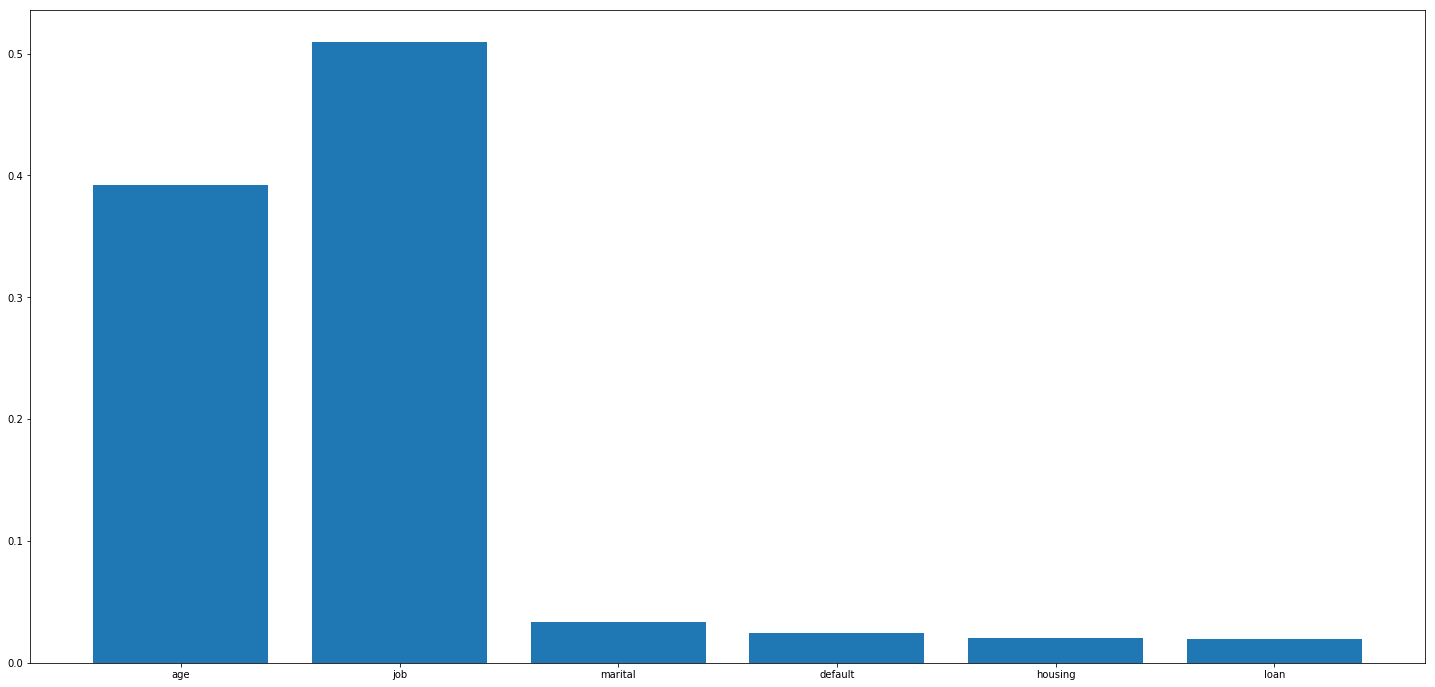

In [376]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [377]:
#As 'age','job' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [378]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [379]:
data_correalation(Xtest)

Index(['job'], dtype='object')


,age,job
7,41,0
10,41,0
26,59,1
30,46,2
31,59,1
32,49,0
67,33,2
78,55,3
92,60,2
100,54,4


In [381]:
pred_education = clf.predict((Xtest))

In [384]:
len(pred_education)

1448

In [383]:
pd.factorize(ytrain)

(array([0, 1, 1, ..., 4, 5, 4]),
 Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'university.degree', 'illiterate'],
       dtype='object'))

In [390]:
c_data_imputation_2= c_data_imputation_1.copy()

In [391]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_2.loc[c_data_imputation_2.education=='unknown','education'] = pred_education

c_data_imputation_2.loc[c_data_imputation_2.education==0,'education'] = 'basic.4y'
c_data_imputation_2.loc[c_data_imputation_2.education==1,'education'] = 'high.school'
c_data_imputation_2.loc[c_data_imputation_2.education==2,'education'] = 'basic.6y'
c_data_imputation_2.loc[c_data_imputation_2.education==3,'education'] = 'basic.9y'
c_data_imputation_2.loc[c_data_imputation_2.education==4,'education'] = 'professional.course'
c_data_imputation_2.loc[c_data_imputation_2.education==5,'education'] = 'university.degree'
c_data_imputation_2.loc[c_data_imputation_2.education==6,'education'] = 'illiterate'


In [392]:
len(c_data_imputation_2[c_data_imputation_2['education']=='unknown']['education'])

0

In [395]:
len(c_data_imputation_2[cleaned_data['education']=='unknown']['education'])

1448

In [396]:
#--------------------------- default ---------------------------------
c_data_removed_default=bank_client_data

In [397]:
y = c_data_removed_default['default']

In [398]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [399]:
Xtest=(c_data_removed_default[c_data_removed_default['default']=='unknown']).drop('default', axis=1)
Xtrain=(c_data_removed_default[-(c_data_removed_default['default']=='unknown')]).drop('default', axis=1)

In [401]:
data_correalation(Xtrain)

Index(['job', 'marital', 'education', 'housing', 'loan'], dtype='object')


,age,job,marital,education,housing,loan
0,56,0,0,0,0,0
2,37,1,0,1,1,0
3,40,2,0,2,0,0
4,56,1,0,1,0,1
6,59,2,0,3,0,0
8,24,3,1,3,1,0
9,25,1,1,1,1,0
11,25,1,1,1,1,0
12,29,4,1,1,0,1
13,57,0,2,0,1,0


In [402]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.3648977 , 0.18045628, 0.04938967, 0.3104321 , 0.05170887,
       0.04311538])

<BarContainer object of 6 artists>

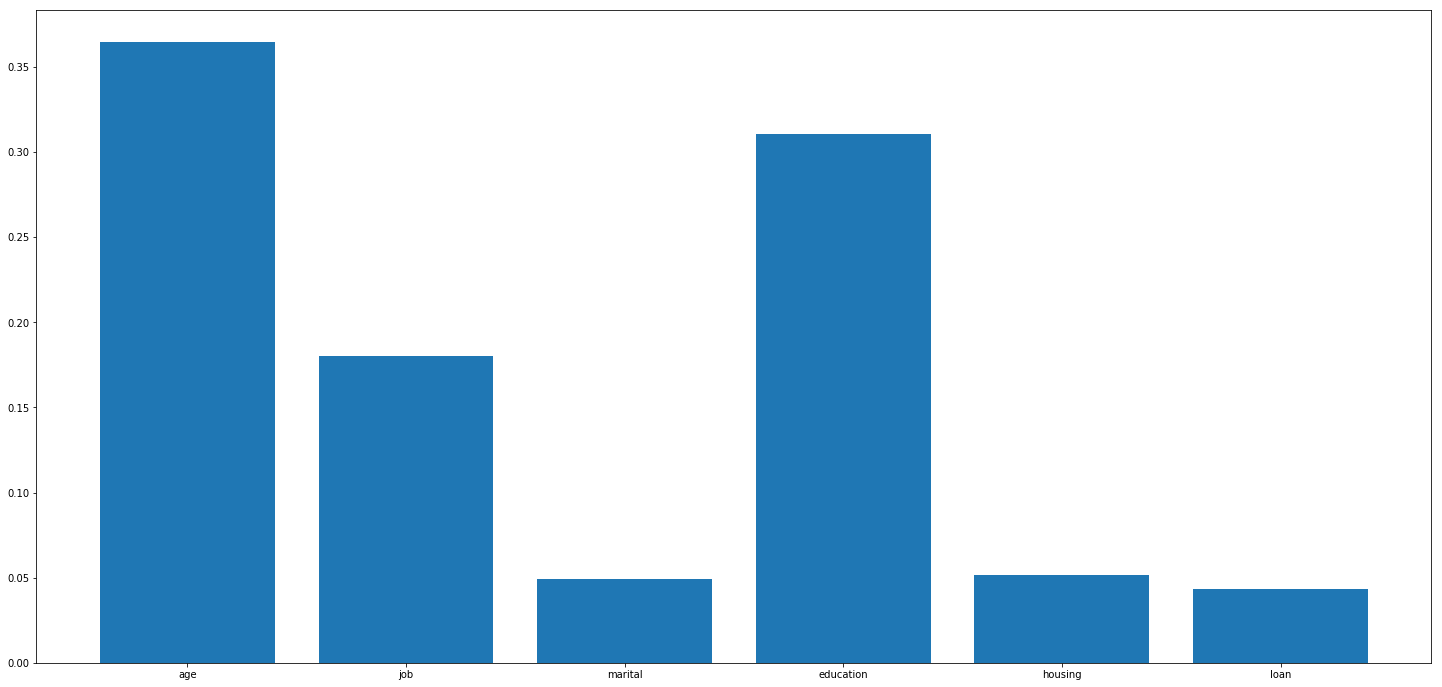

In [403]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [ ]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [404]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [405]:
data_correalation(Xtest)

Index(['job', 'marital', 'education', 'housing', 'loan'], dtype='object')


,age,job,marital,education,housing,loan
1,57,0,0,0,0,0
5,45,0,0,1,0,0
7,41,1,0,2,0,0
10,41,1,0,2,0,0
15,54,2,0,1,1,1
17,46,1,0,3,1,1
19,39,3,1,1,0,0
21,55,1,0,4,1,0
27,39,4,0,1,0,0
28,54,5,1,5,0,0


In [406]:
pred_default = clf.predict((Xtest))

In [408]:
len(pred_default)

7800

In [409]:
pd.factorize(ytrain)

(array([0, 0, 0, ..., 0, 0, 0]), Index(['no', 'yes'], dtype='object'))

In [422]:
c_data_imputation_3= c_data_imputation_2.copy()

In [423]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_3.loc[c_data_imputation_3.default=='unknown','default'] = pred_default

c_data_imputation_3.loc[c_data_imputation_3.default==0,'default'] = 'no'
c_data_imputation_3.loc[c_data_imputation_3.default==1,'default'] = 'yes'


In [424]:
len(c_data_imputation_3[c_data_imputation_3['default']=='unknown']['default'])

0

In [426]:
(c_data_imputation_3[cleaned_data['default']=='unknown']['default'])

1        no
5        no
7        no
10       no
15       no
17       no
19       no
21       no
27       no
28       no
33       no
35       no
44       no
45       no
54       no
55       no
56       no
57       no
58       no
60       no
62       no
63       no
69       no
72       no
74       no
75       no
77       no
78       no
79       no
80       no
         ..
39433    no
39475    no
39476    no
39477    no
39622    no
39625    no
39756    no
39792    no
39953    no
39963    no
39967    no
39974    no
39975    no
40001    no
40076    no
40101    no
40111    no
40393    no
40414    no
40437    no
40672    no
40673    no
40702    no
40714    no
40718    no
40727    no
40886    no
40940    no
40969    no
40986    no
Name: default, Length: 7800, dtype: object

In [427]:
#--------------------------- housing ---------------------------------
c_data_removed_housing=bank_client_data

In [428]:
y = c_data_removed_housing['housing']

In [429]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [430]:
Xtest=(c_data_removed_housing[c_data_removed_housing['housing']=='unknown']).drop('housing', axis=1)
Xtrain=(c_data_removed_housing[-(c_data_removed_housing['housing']=='unknown')]).drop('housing', axis=1)

In [431]:
data_correalation(Xtrain)

Index(['job', 'marital', 'education', 'default', 'loan'], dtype='object')


,age,job,marital,education,default,loan
0,56,0,0,0,0,0
1,57,1,0,1,1,0
2,37,1,0,1,0,0
3,40,2,0,2,0,0
4,56,1,0,1,0,1
5,45,1,0,3,1,0
6,59,2,0,4,0,0
7,41,3,0,5,1,0
8,24,4,1,4,0,0
9,25,1,1,1,0,0


In [432]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.65270173, 0.17257272, 0.03970839, 0.11146653, 0.01456688,
       0.00898375])

<BarContainer object of 6 artists>

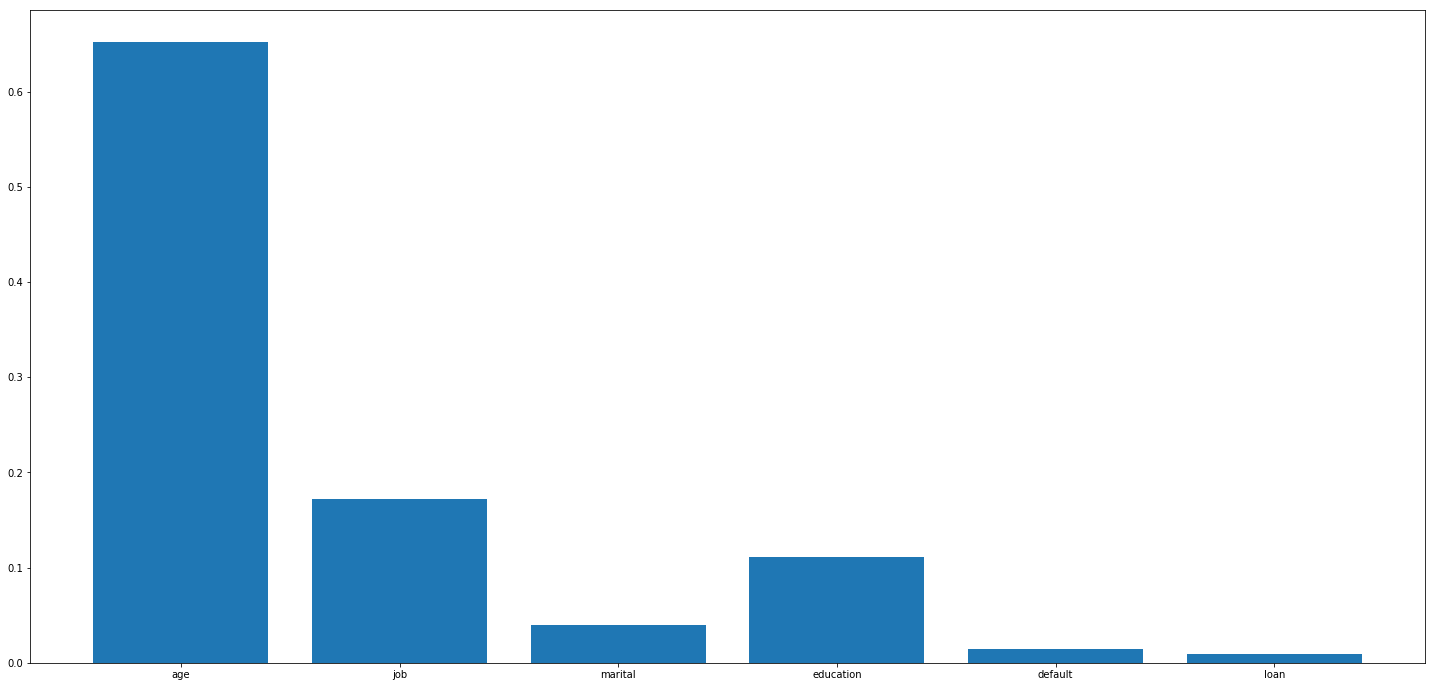

In [433]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [434]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [435]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [437]:
data_correalation(Xtest)

Index(['job', 'education'], dtype='object')


,age,job,education
261,27,0,0
485,36,1,1
501,33,1,2
564,35,1,1
570,49,2,3
571,36,3,3
593,34,4,4
663,35,1,1
777,33,0,2
783,38,0,0


In [438]:
pred_housing = clf.predict((Xtest))

In [440]:
len(pred_housing)

649

In [441]:
pd.factorize(ytrain)

(array([0, 0, 1, ..., 0, 1, 0]), Index(['no', 'yes'], dtype='object'))

In [444]:
c_data_imputation_4= c_data_imputation_3.copy()

In [445]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_4.loc[c_data_imputation_4.housing=='unknown','housing'] = pred_housing

c_data_imputation_4.loc[c_data_imputation_4.housing==0,'housing'] = 'no'
c_data_imputation_4.loc[c_data_imputation_4.housing==1,'housing'] = 'yes'


In [446]:
len(c_data_imputation_4[c_data_imputation_4['housing']=='unknown']['housing'])

0

In [448]:
len((c_data_imputation_4[cleaned_data['housing']=='unknown']['housing']))

649

In [449]:
#--------------------------- loan ---------------------------------
c_data_removed_loan=bank_client_data

In [450]:
y = c_data_removed_loan['loan']

In [451]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [452]:
Xtest=(c_data_removed_loan[c_data_removed_loan['loan']=='unknown']).drop('loan', axis=1)
Xtrain=(c_data_removed_loan[-(c_data_removed_loan['loan']=='unknown')]).drop('loan', axis=1)

In [453]:
data_correalation(Xtrain)

Index(['job', 'marital', 'education', 'default', 'housing'], dtype='object')


,age,job,marital,education,default,housing
0,56,0,0,0,0,0
1,57,1,0,1,1,0
2,37,1,0,1,0,1
3,40,2,0,2,0,0
4,56,1,0,1,0,0
5,45,1,0,3,1,0
6,59,2,0,4,0,0
7,41,3,0,5,1,0
8,24,4,1,4,0,1
9,25,1,1,1,0,1


In [454]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.61330158, 0.17931864, 0.05035849, 0.11728209, 0.02565775,
       0.01408145])

<BarContainer object of 6 artists>

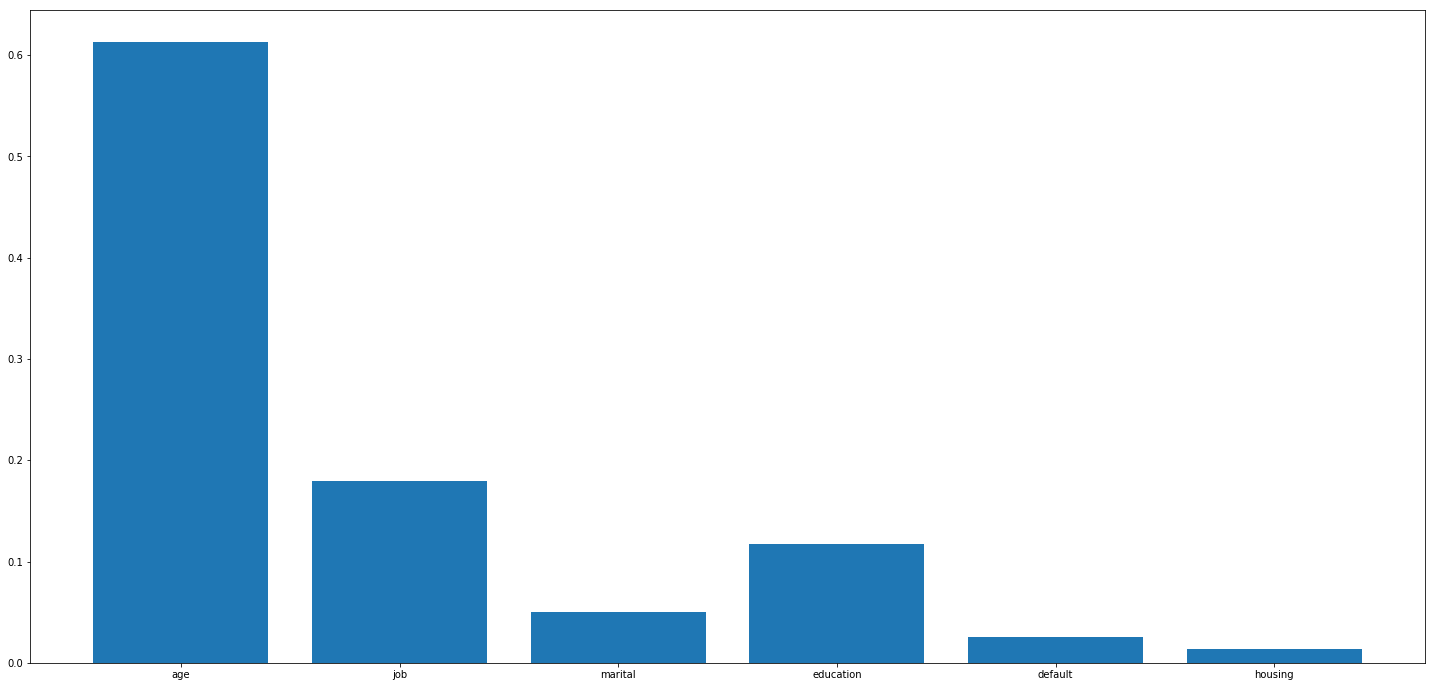

In [455]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [456]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [457]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [458]:
data_correalation(Xtest)

Index(['job', 'education'], dtype='object')


,age,job,education
261,27,0,0
485,36,1,1
501,33,1,2
564,35,1,1
570,49,2,3
571,36,3,3
593,34,4,4
663,35,1,1
777,33,0,2
783,38,0,0


In [459]:
pred_loan = clf.predict((Xtest))

In [461]:
len(pred_loan)

649

In [462]:
pd.factorize(ytrain)

(array([0, 0, 0, ..., 0, 0, 0]), Index(['no', 'yes'], dtype='object'))

In [467]:
c_data_imputation_5= c_data_imputation_4.copy()

In [468]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_5.loc[c_data_imputation_5.loan=='unknown','loan'] = pred_loan

c_data_imputation_5.loc[c_data_imputation_5.loan==0,'loan'] = 'no'
c_data_imputation_5.loc[c_data_imputation_5.loan==1,'loan'] = 'yes'


In [469]:
len(c_data_imputation_5[c_data_imputation_5['loan']=='unknown']['loan'])

0

In [471]:
((c_data_imputation_5[cleaned_data['loan']=='unknown']['loan']))

261       no
485       no
501       no
564       no
570       no
571       no
593       no
663       no
777       no
783       no
798       no
903       no
975       no
982       no
991       no
1004      no
1050      no
1064      no
1110      no
1372      no
1427      no
1597      no
1598      no
1653      no
1886      no
1946      no
1947      no
2132      no
2155      no
2165      no
        ... 
39411     no
39708     no
39717     no
39764     no
39821    yes
39841     no
39870     no
40123     no
40273     no
40367     no
40394     no
40427     no
40430     no
40491     no
40524     no
40530     no
40543     no
40607     no
40627     no
40691     no
40725     no
40732     no
40764     no
40792     no
40832     no
40875     no
40895     no
40990     no
41014     no
41029     no
Name: loan, Length: 649, dtype: object

In [472]:
#Checking the imputation
((c_data_imputation_5[cleaned_data['loan']=='unknown']['loan']))

261       no
485       no
501       no
564       no
570       no
571       no
593       no
663       no
777       no
783       no
798       no
903       no
975       no
982       no
991       no
1004      no
1050      no
1064      no
1110      no
1372      no
1427      no
1597      no
1598      no
1653      no
1886      no
1946      no
1947      no
2132      no
2155      no
2165      no
        ... 
39411     no
39708     no
39717     no
39764     no
39821    yes
39841     no
39870     no
40123     no
40273     no
40367     no
40394     no
40427     no
40430     no
40491     no
40524     no
40530     no
40543     no
40607     no
40627     no
40691     no
40725     no
40732     no
40764     no
40792     no
40832     no
40875     no
40895     no
40990     no
41014     no
41029     no
Name: loan, Length: 649, dtype: object

In [473]:
((c_data_imputation_5[cleaned_data['housing']=='unknown']['housing']))

261       no
485       no
501       no
564      yes
570      yes
571      yes
593      yes
663      yes
777       no
783       no
798       no
903       no
975       no
982      yes
991      yes
1004     yes
1050     yes
1064     yes
1110     yes
1372     yes
1427     yes
1597      no
1598     yes
1653      no
1886      no
1946      no
1947     yes
2132     yes
2155      no
2165     yes
        ... 
39411     no
39708    yes
39717    yes
39764    yes
39821     no
39841    yes
39870    yes
40123    yes
40273     no
40367    yes
40394    yes
40427     no
40430    yes
40491    yes
40524    yes
40530    yes
40543    yes
40607    yes
40627    yes
40691     no
40725    yes
40732    yes
40764     no
40792     no
40832     no
40875    yes
40895    yes
40990    yes
41014    yes
41029    yes
Name: housing, Length: 649, dtype: object

In [474]:
(c_data_imputation_5[cleaned_data['default']=='unknown']['default'])

1        no
5        no
7        no
10       no
15       no
17       no
19       no
21       no
27       no
28       no
33       no
35       no
44       no
45       no
54       no
55       no
56       no
57       no
58       no
60       no
62       no
63       no
69       no
72       no
74       no
75       no
77       no
78       no
79       no
80       no
         ..
39433    no
39475    no
39476    no
39477    no
39622    no
39625    no
39756    no
39792    no
39953    no
39963    no
39967    no
39974    no
39975    no
40001    no
40076    no
40101    no
40111    no
40393    no
40414    no
40437    no
40672    no
40673    no
40702    no
40714    no
40718    no
40727    no
40886    no
40940    no
40969    no
40986    no
Name: default, Length: 7800, dtype: object

In [475]:
(c_data_imputation_5[cleaned_data['education']=='unknown']['education'])

7          university.degree
10         university.degree
26               high.school
30         university.degree
31               high.school
32                  basic.4y
67         university.degree
78       professional.course
92         university.degree
100                 basic.4y
102                 basic.4y
108                 basic.9y
109              high.school
117                 basic.4y
118        university.degree
132                 basic.4y
141      professional.course
151                 basic.4y
153                 basic.4y
154        university.degree
156              high.school
157              high.school
167        university.degree
168        university.degree
203        university.degree
213        university.degree
216              high.school
217              high.school
221              high.school
245                 basic.9y
                ...         
40428               basic.4y
40450      university.degree
40469      university.degree
40481         

In [476]:
(c_data_imputation_5[cleaned_data['job']=='unknown']['job'])

35       blue-collar
144           admin.
303      blue-collar
794      blue-collar
878      blue-collar
885           admin.
1131          admin.
1165     blue-collar
1181      technician
1205     blue-collar
1207     blue-collar
1229     blue-collar
1271     blue-collar
1376     blue-collar
1608      technician
1671     blue-collar
1680     blue-collar
2287     blue-collar
2290     blue-collar
2346     blue-collar
2368      technician
2463         retired
2508     blue-collar
2549     blue-collar
2675     blue-collar
2765          admin.
2834     blue-collar
2854     blue-collar
2886     blue-collar
3097          admin.
            ...     
36987     technician
37149    blue-collar
37303    blue-collar
37506        retired
37688         admin.
37797        retired
38019        retired
38086    blue-collar
38153    blue-collar
38198    blue-collar
38199    blue-collar
38204    blue-collar
38449         admin.
38532     technician
38537     technician
39146        student
39771        

In [478]:
len(c_data_imputation_5[cleaned_data['marital']=='unknown']['marital'])

59

In [484]:
c_data_imputation_5.to_csv('cleaned_and_imputed_data.csv')